<h2></h2>


<h1><center><u>MAJOR PROJECT</u></center></h1>
<h2><center><u>POLLUTION IN INDIA</u></center></h2>
<h2><center><u>NOTEBOOK USED FOR MODELING</u></center></h2>
<h2 style="text-align:right">Submitted By:</h2>
<h2 style="text-align:right">-</h2>
<h2 style="text-align:right">-</h2>

<h4>Include the libraries that we are going to use</h4>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from numpy import log
from statsmodels.tsa.stattools import adfuller
import sys
from pandas.plotting import lag_plot
import numpy as np
import numpy as np
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

In [60]:
df = pd.read_csv('final.csv', index_col=0)#load the data from csv named final.csv

In [61]:
df.head()

,City,Coordinates,Time,PM10_min,PM10_max,PM10_avg,PM2.5_min,PM2.5_max,PM2.5_avg,NO2_min,...,NH3_avg,SO2_min,SO2_max,SO2_avg,CO_min,CO_max,CO_avg,OZONE_min,OZONE_max,OZONE_avg
0,Yamunanagar,"[30.2112003, 77.28638972360895]",2020-09-22 14:00:00,78.0,170.0,121.0,59.0,239.0,134.0,14.0,...,5.0,3.0,7.0,6.0,19.0,74.0,22.0,10.0,122.0,32.0
1,Karnal,"[29.6803266, 76.9896254]",2020-09-22 14:00:00,64.0,113.0,91.0,42.0,227.0,111.0,1.0,...,3.0,5.0,109.0,13.0,16.0,44.0,19.0,4.0,43.0,13.0
2,Ahmedabad,"[23.0216238, 72.5797068]",2020-09-22 14:00:00,57.0,93.0,69.0,13.0,89.0,48.0,23.0,...,NaN,4.0,121.0,28.0,10.0,77.0,37.0,4.0,127.0,52.0
3,Ajmer,"[26.4691, 74.639]",2020-09-22 14:00:00,44.0,114.0,80.0,29.0,147.0,65.0,9.0,...,5.0,9.0,12.0,11.0,24.0,82.0,42.0,6.0,83.0,61.0
4,Alwar,"[27.639077049999997, 76.6144524902045]",2020-09-22 14:00:00,68.0,95.0,81.0,60.0,81.0,71.0,13.0,...,4.0,3.0,29.0,19.0,15.0,40.0,26.0,5.0,84.0,28.0


## AGRA


In [62]:
tdf = df[df['City']=='Agra']#lets take the target city as Agra, then we will look at models for other cities

In [63]:
tdf.columns#remove these columns as our main focus is on PM2.5_avg we drop others columns for now

Index(['City', 'Coordinates', 'Time', 'PM10_min', 'PM10_max', 'PM10_avg',
       'PM2.5_min', 'PM2.5_max', 'PM2.5_avg', 'NO2_min', 'NO2_max', 'NO2_avg',
       'NH3_min', 'NH3_max', 'NH3_avg', 'SO2_min', 'SO2_max', 'SO2_avg',
       'CO_min', 'CO_max', 'CO_avg', 'OZONE_min', 'OZONE_max', 'OZONE_avg'],
      dtype='object')

#### After dropping these columns we set date as index and make a univariate time series

In [64]:
drop_columns=['PM10_min', 'PM10_max', 'PM10_avg', 'PM2.5_min', 'PM2.5_max'
       , 'NO2_min', 'NO2_max', 'NO2_avg', 'NH3_min', 'NH3_max',
       'NH3_avg', 'SO2_min', 'SO2_max', 'SO2_avg', 'CO_min', 'CO_max',
       'CO_avg', 'OZONE_min', 'OZONE_max', 'OZONE_avg', 'Coordinates']

In [65]:
tdf.drop(columns=drop_columns,axis=1,inplace=True)

C:\Users\pratham\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [66]:
tdf.drop(columns='City',axis=1,inplace=True)

In [67]:
tdf['Time']= pd.to_datetime(tdf['Time'],dayfirst=True)
# Set the index to the 'date' column
tdf.set_index('Time', inplace = True)
tdf.dtypes

<ipython-input-67-5eff9ba739b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['Time']= pd.to_datetime(tdf['Time'],dayfirst=True)


PM2.5_avg    float64
dtype: object

In [68]:
tdf##Final time series

,PM2.5_avg
Time,
2020-09-22 14:00:00,94.0
2020-09-22 16:00:00,89.0
2020-09-22 19:00:00,79.0
2020-09-22 22:00:00,62.0
2020-09-23 04:00:00,48.0
...,...
2020-10-21 17:00:00,268.0
2020-10-21 18:00:00,264.0
2020-10-21 19:00:00,259.0


In [69]:
b=tdf.resample('12H').mean()

In [70]:
b=b.interpolate()

<Figure size 720x720 with 0 Axes>

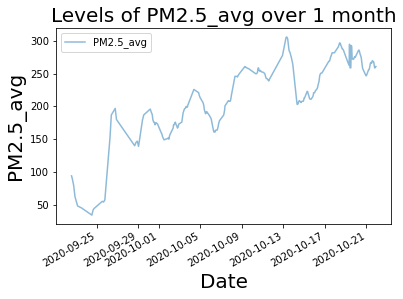

In [71]:
plt.figure(figsize=(10, 10))
tdf.plot(alpha=0.5, style='-')
plt.title('Levels of PM2.5_avg over 1 month', fontsize=20)
plt.ylabel('PM2.5_avg',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.show()

<Figure size 720x720 with 0 Axes>

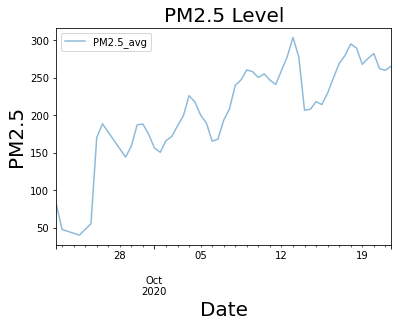

In [72]:
plt.figure(figsize=(10, 10))
b.plot(alpha=0.5, style='-')
plt.title('PM2.5 Level', fontsize=20)
plt.ylabel('PM2.5',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.show()

#### It can be observed from the plot that time series has trend and seasonality so our data is not stationary lets further verify this by performing the AD fuller test and it also confirms the value for the parameter d in ARIMA model

In [73]:
from statsmodels.tsa.stattools import adfuller
print("p-value:", adfuller(b['PM2.5_avg'].dropna())[1])

p-value: 0.08426618617370463


In [74]:
print("p-value:", adfuller(b['PM2.5_avg'].diff().dropna())[1])

p-value: 1.872214357882556e-05


## differencing =1 i.e. d=1 in ARIMA 



#### As it can be clearly seen that for d=1 our data passes the AD Fuller test  now lets find out seasonality for the data

In [75]:
b['new']=b['PM2.5_avg']#made copy because there was a decimal in PM2.5_avg column name
c=b.copy()

In [76]:
c.drop(['PM2.5_avg'],axis=1,inplace=True)

In [77]:
c.groupby(pd.Grouper(freq="W")).new.idxmax()

Time
2020-09-27   2020-09-26 12:00:00
2020-10-04   2020-10-04 00:00:00
2020-10-11   2020-10-09 00:00:00
2020-10-18   2020-10-13 00:00:00
2020-10-25   2020-10-20 00:00:00
Freq: W-SUN, Name: new, dtype: datetime64[ns]

In [78]:
summary=c.groupby(pd.Grouper(freq="W")).agg(
    max_Level = pd.NamedAgg(column='new', aggfunc='max'),
    max_Date = pd.NamedAgg(column='new', aggfunc='idxmax'))

In [79]:
summary['max_Date'][1]-summary['max_Date'][2]

Timedelta('-5 days +00:00:00')

In [80]:
summary

,max_Level,max_Date
Time,,
2020-09-27,188.500000,2020-09-26 12:00:00
2020-10-04,226.000000,2020-10-04 00:00:00
2020-10-11,260.333333,2020-10-09 00:00:00
2020-10-18,303.666667,2020-10-13 00:00:00
2020-10-25,282.166667,2020-10-20 00:00:00


In [81]:
summary.shift(1)

,max_Level,max_Date
Time,,
2020-09-27,NaN,NaT
2020-10-04,188.500000,2020-09-26 12:00:00
2020-10-11,226.000000,2020-10-04 00:00:00
2020-10-18,260.333333,2020-10-09 00:00:00
2020-10-25,303.666667,2020-10-13 00:00:00


In [82]:
summary-summary.shift(1)

,max_Level,max_Date
Time,,
2020-09-27,NaN,NaT
2020-10-04,37.500000,7 days 12:00:00
2020-10-11,34.333333,5 days 00:00:00
2020-10-18,43.333333,4 days 00:00:00
2020-10-25,-21.500000,7 days 00:00:00


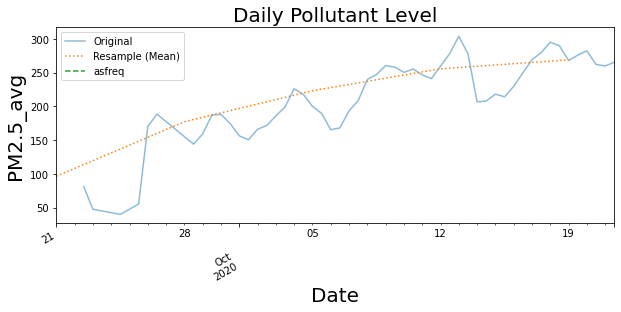

In [83]:
plt.figure(figsize=(10, 4))
ax = plt.gca()
c.plot(alpha=0.5, style='-',ax=ax)
c.resample('W').mean().plot(style=':',ax=ax)   ## Mean taken weekly
c.asfreq('W').plot(style='--',ax=ax);        
plt.legend(['Original', 'Resample (Mean)', 'asfreq'],
loc='upper left',fontsize=10);
plt.title('Daily Pollutant Level', fontsize=20)
plt.ylabel('PM2.5_avg',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.show()

### Let's Decompose our data into different components and observe their plots

In [84]:
b.drop(['new'],axis=1,inplace=True)

In [109]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(b, model='multiplicative', period =7)
trend    = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [110]:
trend.head()

Time
2020-09-22 12:00:00          NaN
2020-09-23 00:00:00          NaN
2020-09-23 12:00:00          NaN
2020-09-24 00:00:00    51.285714
2020-09-24 12:00:00    64.000000
Freq: 12H, Name: trend, dtype: float64

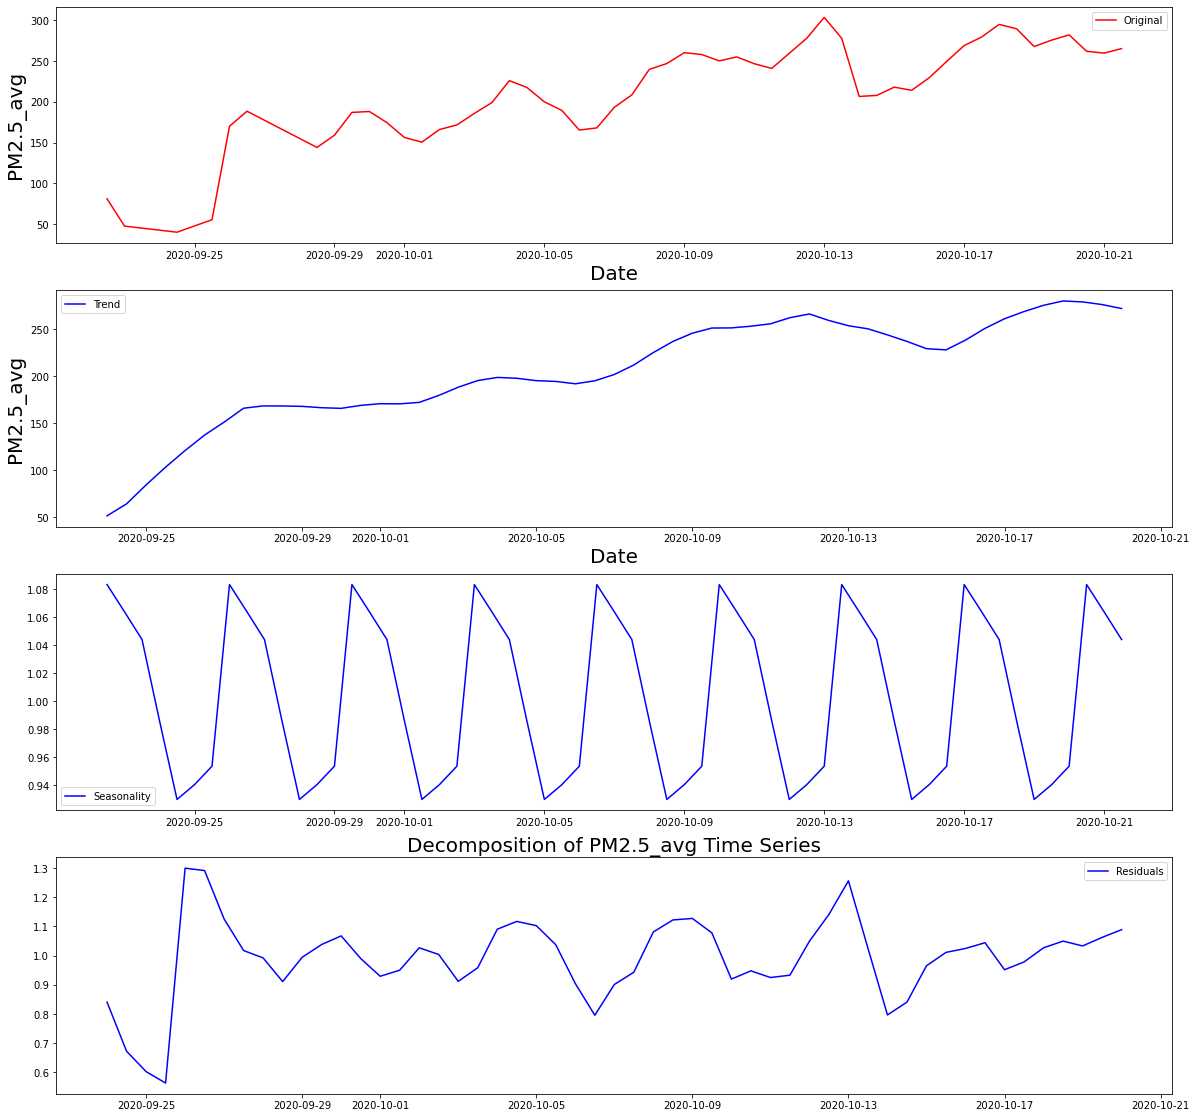

<Figure size 432x288 with 0 Axes>

In [111]:

plt.figure(figsize=(20,20))
plt.subplot(411)
plt.plot(b, label='Original', color="red")
plt.legend(loc='best')
plt.ylabel('PM2.5_avg',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.ylabel('PM2.5_avg',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.title('Decomposition of PM2.5_avg Time Series', fontsize=20)
plt.show()

plt.tight_layout()

## The plot shows that the data has both trend & seasonality. That means it is not stationary.

In [88]:
from statsmodels.tsa.stattools import adfuller
print("p-value:", adfuller(trend.dropna())[1])

p-value: 0.3474628374001792


In [89]:
#Here we have done 90/10 split of our data 
train_data=b[:datetime(2020,10,18)]
test_data=b[datetime(2020,10,19):datetime(2020,10,21)]

In [90]:
data_d = b.diff().dropna()

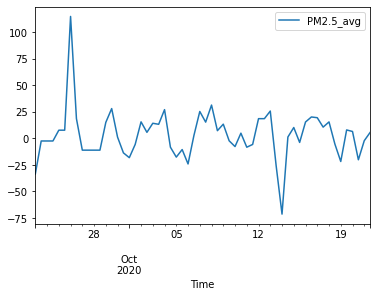

In [91]:
data_d.plot()

In [92]:
data_d.shape

(58, 1)

In [93]:
data_d.head(2)

,PM2.5_avg
Time,
2020-09-23 00:00:00,-33.5
2020-09-23 12:00:00,-2.5


In [94]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

# Differenced Version with d=1


In [95]:
print("p-value:", adfuller(b['PM2.5_avg'].diff().dropna())[1])

p-value: 1.872214357882556e-05


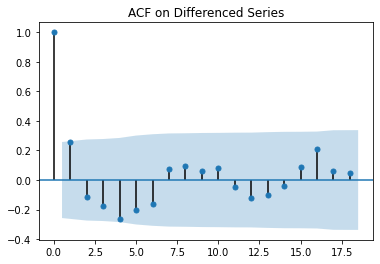

In [96]:
fig = plot_acf(b['PM2.5_avg'].diff().dropna(), 
               title="ACF on Differenced Series") 

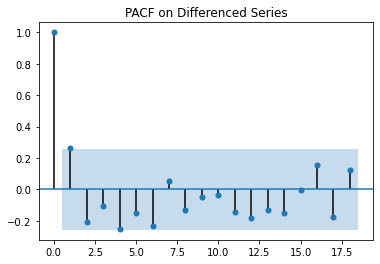

In [97]:
fig = plot_pacf(b['PM2.5_avg'].diff().dropna(), 
               title="PACF on Differenced Series") 

#### It can be seen p=2 from the pacf plot and we have to keep one of p or q=1 so lets try q with different values and we get best results for q=1

#### Also tried to fit the model with other parameters (p,d,q) too for the below one got the best results out of those

In [98]:
model3 = ARIMA(train_data['PM2.5_avg'], order=(1,1,0))
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.PM2.5_avg   No. Observations:                   51
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -232.328
Method:                       css-mle   S.D. of innovations             23.005
Date:                Wed, 18 Nov 2020   AIC                            470.655
Time:                        10:54:45   BIC                            476.451
Sample:                    09-23-2020   HQIC                           472.870
                         - 10-18-2020                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.9997      4.429      0.903      0.366      -4.681      12.680
ar.L1.D.PM2.5_avg     0.2778      0.137      2.032      0.042       0.010       0.546
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.6000           +0.0000j            3.6000            0.0000
-----------------------------------------------------------------------------
"""

### As it can be seen that P>|z| for const is high so this model is not correct but SARIMA models solves this with slightly better accuracy

In [99]:
fcast3=results3.forecast(5)
fcast3=pd.DataFrame({"Forecast": fcast3[0]},index=test_data.index)
residuals3 = test_data - fcast3.values
residuals3.head()

,PM2.5_avg
Time,
2020-10-19 00:00:00,-34.348234
2020-10-19 12:00:00,-31.337821
2020-10-20 00:00:00,-29.143612
2020-10-20 12:00:00,-53.378146
2020-10-21 00:00:00,-59.646760


In [42]:
fcast3#forcasted polutant leevels

,Forecast
Time,
2020-10-19 00:00:00,302.181567
2020-10-19 12:00:00,307.065094
2020-10-20 00:00:00,311.310278
2020-10-20 12:00:00,315.378146
2020-10-21 00:00:00,319.396760


Text(0, 0.5, 'Error')

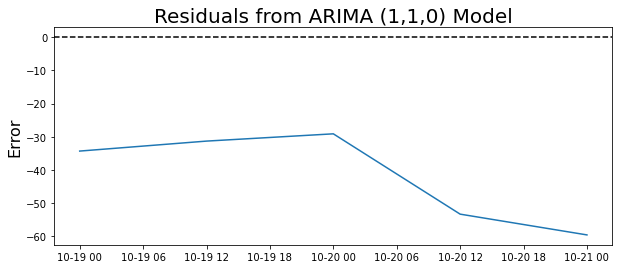

In [100]:
plt.figure(figsize=(10,4))
plt.plot(residuals3)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from ARIMA (1,1,0) Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

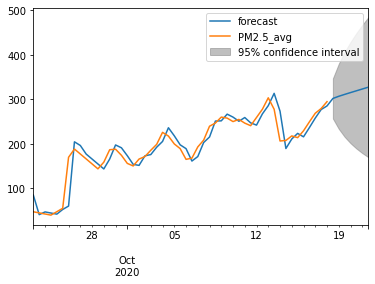

In [101]:
results3.plot_predict(1, 58)
plt.show()

In [102]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals3/test_data)),6))

Mean Absolute Percent Error: PM2.5_avg    0.15571
dtype: float64


In [103]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals3**2)))

Root Mean Squared Error: PM2.5_avg    43.400859
dtype: float64


## Finally we fit our data in Seasonal ARIMA model to get  the better forecasting

### Here we use auto arima to select the parameters for the SARIMA model

In [104]:
import pmdarima

In [105]:
from pmdarima import auto_arima
pm_arima = auto_arima(train_data['PM2.5_avg'], test = 'adf'
                      , start_p=1, start_q=1, m = 7,
                      stepwise=True, trace = True, 
                      suppress_warnings=True,
                      error_action='ignore', seasonal = True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=485.529, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=591.016, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=488.370, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=536.446, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=702.274, Time=0.00 sec
 ARIMA(1,0,1)(0,0,1)[7] intercept   : AIC=483.569, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=482.002, Time=0.07 sec
 ARIMA(1,0,1)(1,0,0)[7] intercept   : AIC=483.613, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=539.698, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=487.005, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[7] intercept   : AIC=483.938, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=483.954, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[7] intercept   : AIC=514.510, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[7] intercept   : AIC=482.482, Time=0.08 sec
 ARIMA(2,0,2)(0,0,0)[7] intercept   : AIC=inf, 

### Fit the SARIMA Model


In [112]:
my_order = (1,0,1)
my_seasonal_order = (0, 0, 0, 7)
# define model
model4 = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)

In [113]:
#fit the model
start = time()
model4_fit = model4.fit()
end = time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 0.050897836685180664


C:\Users\pratham\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [114]:
#summary of the model
print(model4_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              PM2.5_avg   No. Observations:                   52
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -238.836
Date:                Wed, 18 Nov 2020   AIC                            483.673
Time:                        10:58:29   BIC                            489.527
Sample:                    09-22-2020   HQIC                           485.917
                         - 10-18-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9894      0.018     55.298      0.000       0.954       1.025
ma.L1          0.3670      0.145      2.534      0.011       0.083       0.651
sigma2       522.7731     43.364     12.056      0.0

In [115]:
fcast4=model4_fit.forecast(5)
fcast4=pd.DataFrame({"Forecast": fcast4[0]},index=test_data.index)
residuals4 = test_data - fcast4.values
residuals4.head()

,PM2.5_avg
Time,
2020-10-19 00:00:00,-29.809584
2020-10-19 12:00:00,-21.915645
2020-10-20 00:00:00,-15.476251
2020-10-20 12:00:00,-35.642917
2020-10-21 00:00:00,-37.892917


Text(0, 0.5, 'Error')

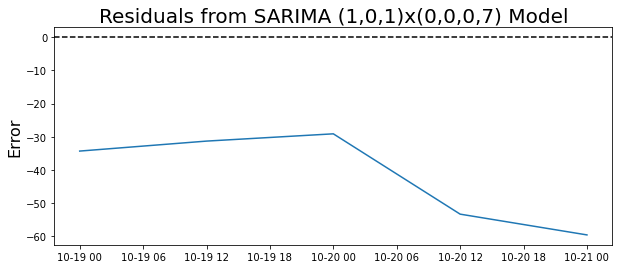

In [116]:
plt.figure(figsize=(10,4))
plt.plot(residuals3)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA (1,0,1)x(0,0,0,7) Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

In [117]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals4/test_data)),5))

Mean Absolute Percent Error: PM2.5_avg    0.10551
dtype: float64


In [118]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals4**2)))

Root Mean Squared Error: PM2.5_avg    29.375881
dtype: float64


## So as we can observe we are getting 10.55% MAPE in our final model for this city, and every P>|z| is very small in model summary 

<hr>

<hr>